# Lista de exercícios da prova 1

## Questão 1 :

Para esta questão da lista, Podemos fazer duas soluções :

1 - Podemos passar a imagem de RGB para escala de cinza e aplicar a normalização do histograma
2 - Podemos criar uma função que **separa as três andas R, G e B, calcular a normalização para cada canal de cor e depois agregar novamente na imagem os valores normalizados**.

A referência desta resposta foi tirada neste [link](https://towardsdatascience.com/histogram-equalization-a-simple-way-to-improve-the-contrast-of-your-image-bcd66596d815#:~:text=We%20can%20do%20this%20in,green%2C%20blue%3B%20call%20cv2)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histogram_equalization(img_in: np.ndarray) -> np.ndarray:
    # segregate color streams
    b, g, r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])

    # calculate cdf
    cdf_b = np.cumsum(h_b)
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)

    # mask all pixels with value=0 and replace it with mean of the pixel values
    cdf_m_b = np.ma.masked_equal(cdf_b, 0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min()) * 255 / (cdf_m_b.max() - cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b, 0).astype('uint8')

    cdf_m_g = np.ma.masked_equal(cdf_g, 0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min()) * 255 / (cdf_m_g.max() - cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g, 0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r, 0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min()) * 255 / (cdf_m_r.max() - cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r, 0).astype('uint8')

    # merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]

    img_out = cv2.merge((img_b, img_g, img_r))

    # validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    cv2.imwrite('RespostaPer1/output_name.png', equ)
    plt.imshow(equ[..., ::-1], cmap="gray", vmin=equ.min(), vmax=equ.max())
    plt.axis("off")
    plt.show()
    return img_out

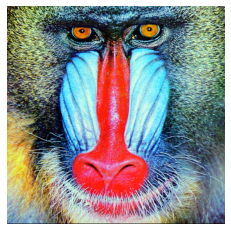

In [2]:
babbon_img = cv2.imread("baboon.png")
res_img = histogram_equalization(babbon_img)

## Questão 2 :

Queremos utilizar o **média ou mediana quando queremos extrair informações em uma vizinhança $n$ x $n$ de uma imagem**. A referência é encontrada neste [link](https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm#:~:text=By%20calculating%20the%20median%20value,affect%20the%20median%20value%20significantly)

Além disso, é recomendo utilizar esses tipos de filtros quando a [**imagem apresenta características de _salt-n-peppers_**](https://stackoverflow.com/questions/20638912/should-i-choose-mean-or-median-filter-for-gaussian-noise#:~:text=As%20a%20general%20rule%20of,to%20approximate%20the%20gaussian%20filter). Ou seja, geralmente são utilizados para **diminuir ruidos na imagem, sendo considerados como filtros de passa-baixa**

### Filtro da média
O filtro da média é calculado tirando a média dos valores de uma vizinhança, sendo este o novo valor do limiar para alguma técnica de _threshold_.

### Filtro da mediana

Esse filtro também considerado como um filtro local. Essa técnica envolve em organizar os valores de forma crescente em uma janela e pegar o "valor do meio" como o valor para o _threshold_ adotado.

### Conclusão dos filtros
De modo geral, o **filtro da mediana apresenta um melhor desempenho se comparado com o filtro da média**.

Isto porque a mediana é mais robusta para variações, comparado com a média, e consegue filtrar melhores os valores _out-liers_ dentro desta vizinhança.

Além disso, como o valor da mediana será um valor real dentro da vizinhança, este método não cria valores de _pixels_ que não são condizentes com a realidade quando o filtramos uma borda. Desta forma, este filtro preserva muito mais a inforamção dessas bordas comparado com o outro filtro.

A sua única desvantagem é que o método da mediana é mais custoso que o método da média, já que ele exige ordenar o intervalo dos valores da janela.

## Questão 3

O propósito de filtros gassuianos são de **atenuar as altas frequências que estao relacionadas com a informação de uma imagem**. Consequentemente, eles são considerados como **filtros passa-baixa e sendo ótimos para fazer suavização em imagens e reduzir ruídos em imagens. Dessa forma, fazendo um _blur_ em contornos e reduzindo contraste das imagens**. O _link_ da referência se encontra [aqui](https://www.mathworks.com/matlabcentral/answers/294211-why-is-gaussian-filter-used-in-image-filtering-what-are-its-advantages-compared-to-other-filters-li). Outra referência útil que pode ser analisada é neste outro [link](https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm) que explica com mais detalhes sobre esta função.

De forma geral, os filtros gaussianos substituem **cada pixel por uma média ponderada dos pixels vizinhos, de forma que o peso dado a um visinho descresce de forma monôtona com a distância do pixel central**

## Questão 4

Inicialmente, iremos definir que cada pixel de uma matriz $I_{m}$ com $n$ x $n$ é da forma

$$
I_{m}(x, y) = |x - y|
$$

Dessa forma, vamos criar a função para inicializar a matriz

In [3]:
def init_matrix(n: int) -> np.ndarray:
    img = np.zeros(shape=(n, n), dtype=np.uint8)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img[x, y] = np.abs(x - y)

    return img

De forma particular, queremos que $n = 7$. Porntanto, teremos que

In [4]:
img = init_matrix(7)
print(img)

[[0 1 2 3 4 5 6]
 [1 0 1 2 3 4 5]
 [2 1 0 1 2 3 4]
 [3 2 1 0 1 2 3]
 [4 3 2 1 0 1 2]
 [5 4 3 2 1 0 1]
 [6 5 4 3 2 1 0]]


Agora, vamos criar a função que calcula a mediana de uma função usando _numpy_ e _generic_filters do scipy_

In [5]:
from scipy.ndimage import generic_filter


def _median_filter_block(img_block: np.ndarray) -> int:
    return int(np.median(img_block))


def median_filter_vec(img: np.ndarray, n: int) -> np.ndarray:
    median_img = generic_filter(img, _median_filter_block, n, mode="reflect")
    return median_img


print("filtro dá média para uma vizinhança 3x3")
print(median_filter_vec(img, 3))

filtro dá média para uma vizinhança 3x3
[[0 1 2 3 4 5 5]
 [1 1 1 2 3 4 5]
 [2 1 1 1 2 3 4]
 [3 2 1 1 1 2 3]
 [4 3 2 1 1 1 2]
 [5 4 3 2 1 1 1]
 [5 5 4 3 2 1 0]]


OBS : Nesse modelo, está vetorizado e não está fazendo um tratamento adequado das bordas. Para isso, teriamos que fazer de forma iterativa de tal forma que verificamos se o píxel está na beirada ou não. Caso ele esteja, só desconsideramos utilizar a mediana do bloco $3$x$3$.

TODO : Criar uma fórmula para o caso Geral quando conseguir um tempinho livre

In [6]:
def median_filter_loop(img: np.ndarray) -> np.ndarray:
    median_img = img.copy()

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            # verificando se o bloco é fronteira
            if ((x - 1 >= 0 and
                 y - 1 >= 0 and
                 x + 1 < img.shape[0] and
                 y + 1 < img.shape[1])):
                median_block = np.zeros(shape=(3, 3), dtype=img.dtype)

                median_block[0, 0] = img[x - 1, y - 1]
                median_block[0, 1] = img[x - 1, y]
                median_block[0, 2] = img[x - 1, y + 1]

                median_block[1, 0] = img[x, y - 1]
                median_block[1, 2] = img[x, y + 1]

                median_block[2, 0] = img[x + 1, y - 1]
                median_block[2, 1] = img[x + 1, y]
                median_block[2, 2] = img[x + 1, y + 1]

                median_img[x, y] = np.median(median_block)

    return median_img


print(img)
print(median_filter_loop(img))

[[0 1 2 3 4 5 6]
 [1 0 1 2 3 4 5]
 [2 1 0 1 2 3 4]
 [3 2 1 0 1 2 3]
 [4 3 2 1 0 1 2]
 [5 4 3 2 1 0 1]
 [6 5 4 3 2 1 0]]
[[0 1 2 3 4 5 6]
 [1 1 1 2 3 4 5]
 [2 1 1 1 2 3 4]
 [3 2 1 1 1 2 3]
 [4 3 2 1 1 1 2]
 [5 4 3 2 1 1 1]
 [6 5 4 3 2 1 0]]


## Questão 5

Incialmente, é desejado que estes filtros sejam **filtros passa-alta para enfatizar as altas frequências de uma imagem, nas quais estão relacionadas com informação de detalhes da imagem. Dessa forma, deixando as beiradas de objetos mais enfatizados na imagem**. Com isso, podemos conseguir informação para encontrar bordas de objetos em imagem.

Este [link](ttps://jmlb.github.io/flashcards/2018/06/30/computer_vision_edge_detection/) contém uma explicação em como podemos fazer isso utilizando um filtro _de sobel_. Também é possível fazer isso utilizando _laplaciado de gaussianas_

## Questão 6

A **resolução espacial** está relacionado *na informação de distância de um pixel que representa a realidade*. Enquanto que **profundidade em imagens** está relacionado *na quantidadde de inforamção de cor que em cada pixel em uma imagem*.

## Questão 8

Idealmente, a **detecção de bordas é uma operação de identificação de mudanças locais significativas dos níveis de cinza de uma imagem**. Além disso, como uma imagem depende de duas coordenadas espaciais, as **bordas das imagens podem ser expressas por derivadas parciais, principalmente de primeira ordem e segunda ordem (Laplaciano)**.

Com isso, uma operação comum é adotar a derivada como o gradiente da imagem da forma

$$
\nabla f(x,y) = (\frac{\partial f(x, y)}{\partial x}, \frac{\partial f(x, y)}{\partial y})
$$

Desta forma, podemos definir que é uma borda se

$$
\sqrt{(\frac{\partial f(x, y)}{\partial x})^{2} + (\frac{\partial f(x, y)}{\partial y})^{2}} > T
$$

com $T \in [0, 255]$

## Questão 9.1

A idea desta parte é criar uma reta da forma $b = -mx + y$ para cada coordenada e calcular os seus valores desejados.

Vamos analisar em um exemplo. Dado os pontos (1, 2), (2, 3), (3, 4). Vamos montar uma equação que seja da seguinte forma nas coordenadas (m, b).

### Para os pontos (1, 2)

#### Se $b_{1}$ = 0

$$ 0 = 2 - m \implies m = 2$$

#### Se $m_{1}$ = 0

$$ b = 2 - 0*x \implies b = 2$$

#### Portanto, temos que $(m_{1}, b_{1}) = (2, 2)$

### Para os pontos (2, 3)

#### Se $b_{2}$ = 0

$$ 0 = 3 - 2m \implies m = 1.5$$

#### Se $m_{2}$ = 0

$$ b = 3 - 0*x \implies b = 3$$

#### Portanto, temos que $(m_{1}, b_{1}) = (1.5, 3)$

### Para os pontos (3, 4)

#### Se $b_{3}$ = 0

$$ 0 = 4 - 3m \implies m = 1.33$$

#### Se $m_{3}$ = 0

$$ b = 4 - 0*x \implies b = 4$$

#### Portanto, temos que $(m_{1}, b_{1}) = (1.33, 4)$


### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{1}, b_{1})$
$$
R_{1} = a_{1} + c_{1} \implies 2 = c_{1} \implies 0 = 2*a_{1} + c_{1} \implies a_{1} = -1
$$

### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{2}, b_{2})$
$$
R_{2} = a_{2} + c_{2} \implies 3 = c_{2} \implies 0 = 1.5*a_{2} + c_{2} \implies a_{2} = -2
$$

### Agora, vamos ver como as retas se intersectam

$$-x + 2 = -2x + 3 \implies x = 1$$

Agora, substituindo em alguma das duas equações, temos que $-1 + 2 = 1$ (coeficiente translação). Com isso, temos que a equação original é da forma

$$
y = x + 1
$$

## Questão 9

Dado os pontos (1, 3), (2, 6), (4, 12). Vamos montar uma equação que seja da seguinte forma nas coordenadas (m, b).

### Para os pontos (1, 3)

#### Se $b_{1}$ = 0

$$ 0 = 3 - m \implies m = 3$$

#### Se $m_{1}$ = 0

$$ b = 3 - 0*x \implies b = 3$$

#### Portanto, temos que $(m_{1}, b_{1}) = (3, 3)$

### Para os pontos (2, 6)

#### Se $b_{2}$ = 0

$$ 0 = 6 - 2m \implies m = 3$$

#### Se $m_{2}$ = 0

$$ b = 6 - 0*x \implies b = 6$$

#### Portanto, temos que $(m_{1}, b_{1}) = (3, 6)$

### Para os pontos (4, 12)

#### Se $b_{3}$ = 0

$$ 0 = 12 - 4m \implies m = 3$$

#### Se $m_{3}$ = 0

$$ b = 12 - 0*x \implies b = 12$$

#### Portanto, temos que $(m_{1}, b_{1}) = (3, 12)$


### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{1}, b_{1})$
$$
R_{1} = a_{1} + c_{1} \implies 3 = c_{1} \implies 0 = 3*a_{1} + 3 \implies a_{1} = -1
$$

### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{2}, b_{2})$
$$
R_{2} = a_{2} + c_{2} \implies 6 = c_{2} \implies 0 = 3*a_{2} + 6 \implies a_{2} = -2
$$

### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{3}, b_{3})$
$$
R_{3} = a_{3} + c_{3} \implies 12 = c_{3} \implies 0 = 3*a_{3} + 12 \implies a_{3} = -4
$$

### Agora, vamos ver como as retas se intersectam. Note que as retas $R_{2}$ e $R_{3}$ são combinações lineares entre si

$$-x + 3 = -2x + 6 \implies x = 3$$

Agora, substituindo em alguma das duas equações, temos que $-3 + 3 = 0$ (coeficiente de translação). Com isso, temos que a equação original é da forma

$$
y = 3x
$$

## Questão 13

Para esta questão, vamos criar uma função que normaliza os valores dado um intervalo desejado

In [7]:
def change_img_range(img: np.ndarray, start_range: int, end_range: int) -> np.ndarray:
    img_transform = img.copy()
    print("valor de pixel mínimo da antes da transformação : {}".format(img_transform.min()))
    print("valor de pixel máximo da antes da transformada : {}".format(img_transform.max()))

    # Normalizando a imagem o intervalo [0, 1]
    img_transform = (img_transform - np.min(img_transform)) / np.ptp(img_transform)
    new_range = (end_range - start_range)

    # Normalizando a imagem no intervalo [start_range, end_range] como np.uint8
    img_transform = ((new_range * (img_transform - np.min(img_transform)) / np.ptp(img_transform)) + start_range).astype(
        img.dtype)

    print("valor de pixel mínimo após a transformada : {}".format(img_transform.min()))
    print("valor de pixel máximo após a transformada : {}".format(img_transform.max()))
    return img_transform

f = change_img_range(babbon_img, 0, 60)

valor de pixel mínimo da antes da transformação : 0
valor de pixel máximo da antes da transformada : 255
valor de pixel mínimo após a transformada : 0
valor de pixel máximo após a transformada : 60


In [8]:
z = change_img_range(f, 10, 210)

valor de pixel mínimo da antes da transformação : 0
valor de pixel máximo da antes da transformada : 60
valor de pixel mínimo após a transformada : 10
valor de pixel máximo após a transformada : 210
